<a href="https://colab.research.google.com/github/Ibitoye-Oyinloye/E_news_Express_Project/blob/main/Anime_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import io
import os
import sys

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Dictionary

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

1. title: title of the anime
2. mediaType: format of publication
3. eps: number of episodes (movies are considered 1 episode)
4. duration: duration of an episode in minutes
5. startYr: the year that airing started
6. finishYr: the year that airing finished
7. description: the synopsis of the plot
8. contentWarn: content warning
9. watched: number of users that completed it
10. watching: number of users that are watching it
11. rating: average user rating
12. votes: number of votes that contribute to the rating
13. studio_primary: studios responsible for creation
14. studios_colab: whether there was a collaboration between studios for anime production
15. genre: genre to which the anime belongs

## Load and Import Data

In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file from your local machine to Google Colab
uploaded = files.upload()



Saving anime_ratings_data.csv to anime_ratings_data (1).csv


In [ ]:
data = pd.read_csv("anime_ratings_data.csv")

In [ ]:
# Create a copy of the dataframe
df = data.copy()

In [ ]:
df.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [ ]:
df.tail()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
6518,"Watamote: No Matter How I Look at It, It's You...",TV,12,5.0,2013,2013,"Tomoko Kuroki is eager to begin her new, glamo...",No,4649,199,3.633,3100.0,Others,No,Other
6519,Eight Clouds Rising,OVA,2,44.5,1997,1997,Kuraki has taken his grandfather’s ancient swo...,No,341,9,2.573,208.0,Studio Pierrot,No,Other
6520,Ishifuro: Ryuu no Tani to Taiyou no Toride,Music Video,1,4.0,2016,2016,NaN,No,25,0,1.749,14.0,Others,No,Other
6521,Sword Art Online: Alicization,TV,24,7.5,2018,2019,"Kirito awakens in a vast, fantastical forest f...",Yes,4649,199,4.145,3100.0,A-1 Pictures,No,Other
6522,xxxHOLiC Kei,TV,13,12.0,2008,2008,"Watanuki, who is able to see the spirit world,...",No,4649,199,4.399,3100.0,Production I.G,No,Other


In [ ]:
# Print shape of DataFrame
print('Shape of DataFrame:', df.shape)

Shape of DataFrame: (6523, 15)


In [ ]:
# Find and count duplicate rows
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)

# Print duplicate rows and count
print('Duplicate Rows:')
print(duplicates)
print('Total Duplicates:', num_duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [title, mediaType, eps, duration, startYr, finishYr, description, contentWarn, watched, watching, rating, votes, studio_primary, studios_colab, genre]
Index: []
Total Duplicates: 0


In [ ]:
# Print data types of each column
print('Data Types:')
print(df.dtypes)

Data Types:
title              object
mediaType          object
eps                 int64
duration          float64
startYr             int64
finishYr            int64
description        object
contentWarn        object
watched             int64
watching            int64
rating            float64
votes             float64
studio_primary     object
studios_colab      object
genre              object
dtype: object


## Statistical Summary

In [ ]:
# Print numerical summary
print('Numerical Summary:')
df.describe().T


Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
eps,6523.0,8.716235,11.002479,1.000,1.000,1.000,12.000,34.000
duration,6248.0,18.396287,20.949350,1.000,5.000,7.000,25.000,67.000
startYr,6523.0,2005.241147,12.911035,1967.000,2000.000,2010.000,2015.000,2020.000
finishYr,6523.0,2005.575349,12.568169,1970.000,2000.000,2010.000,2015.000,2020.000
watched,6523.0,1347.948643,1737.138112,5.000,56.000,349.000,2252.500,4649.000
watching,6523.0,57.445654,76.527405,0.000,2.000,13.000,98.000,199.000
rating,6523.0,2.962553,0.760486,1.111,2.371,2.944,3.568,4.702
votes,6496.0,906.253233,1171.677648,10.000,34.000,227.500,1567.750,3100.000


In [ ]:
# Print categorical summary
print('Categorical Summary:')
df.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1
mediaType,6496,8,TV,2145
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3
contentWarn,6523,2,No,5825
studio_primary,6523,11,Others,4684
studios_colab,6523,2,No,6210
genre,6523,9,Other,5468


## EDA
### Univariate Analysis

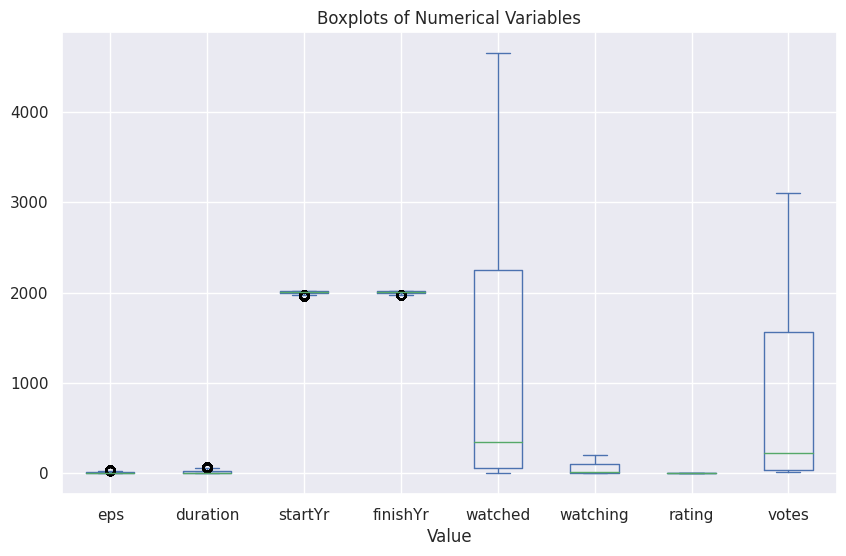

In [ ]:
# Create a boxplot for each numerical variable in the dataframe
num_vars = df.select_dtypes(include=['float64', 'int64']).columns
df[num_vars].plot(kind='box', vert=True, figsize=(10,6))

# Set plot title and axis labels
plt.title('Boxplots of Numerical Variables')
plt.xlabel('Value')
plt.show()

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations

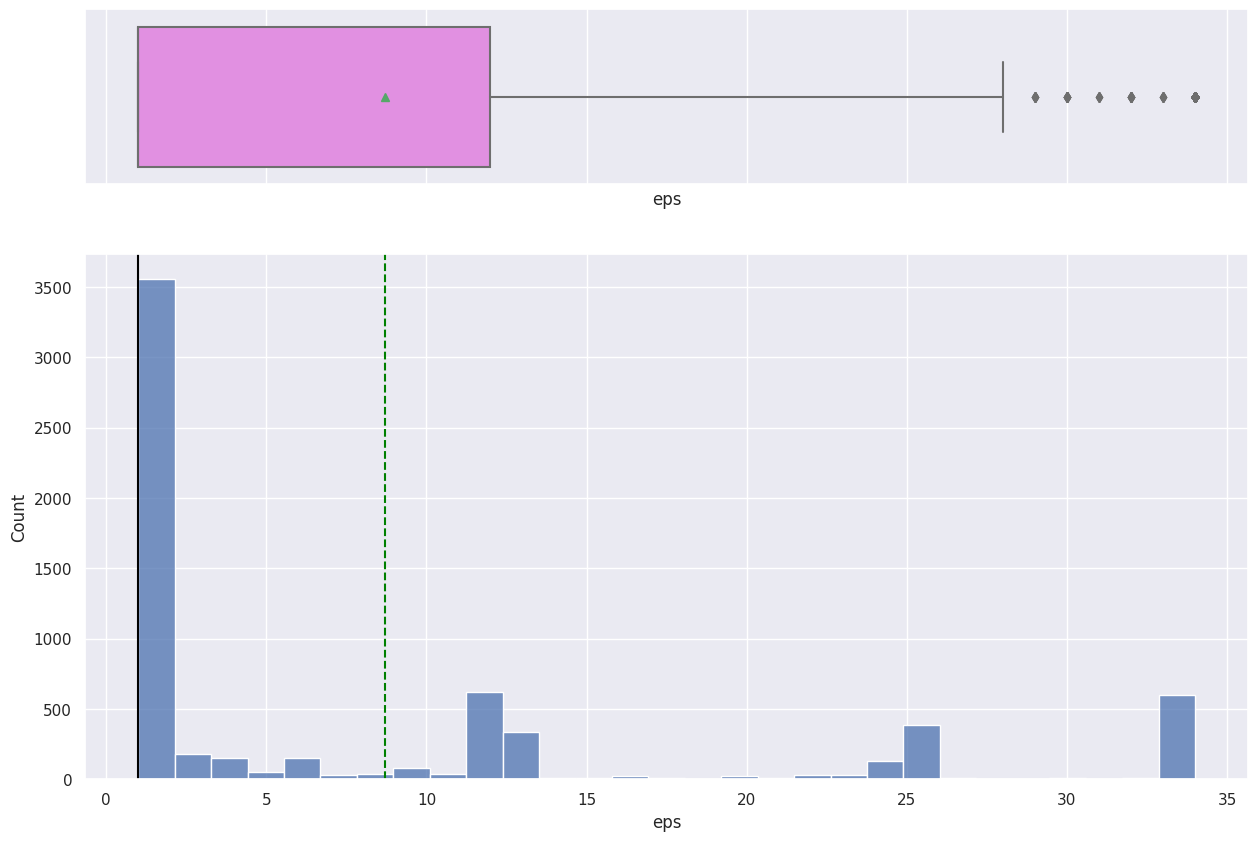

In [ ]:
histogram_boxplot(df, "eps")

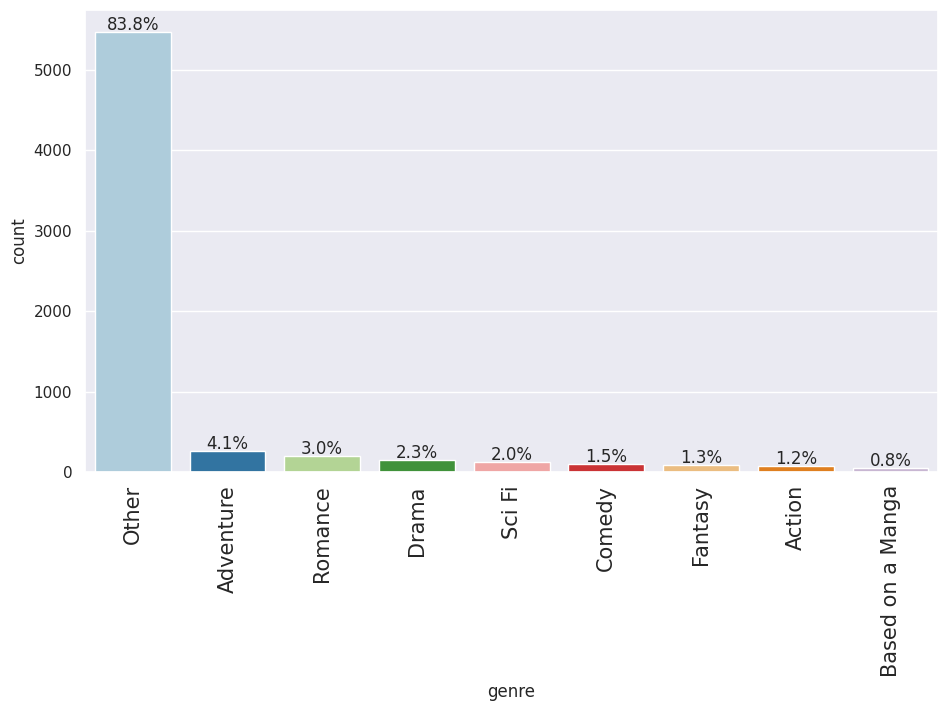

In [ ]:
labeled_barplot(df, "genre", perc=True)

## Correlation Analysis

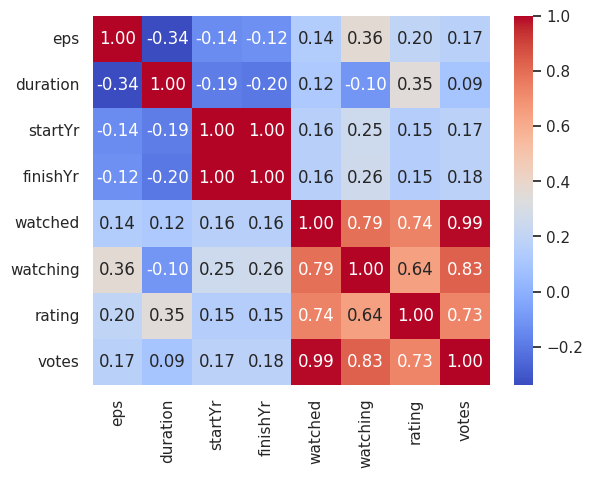

In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

In [ ]:
# Select only the numerical continuous variables from the DataFrame
numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix using the Pearson correlation coefficient
corr_matrix = df[numerical_vars].corr(method='pearson')

# Print the correlation matrix
print(corr_matrix)

               eps  duration   startYr  finishYr   watched  watching  \
eps       1.000000 -0.338987 -0.138738 -0.121347  0.141514  0.363967   
duration -0.338987  1.000000 -0.186604 -0.198392  0.116246 -0.100920   
startYr  -0.138738 -0.186604  1.000000  0.998135  0.159349  0.252908   
finishYr -0.121347 -0.198392  0.998135  1.000000  0.159293  0.259328   
watched   0.141514  0.116246  0.159349  0.159293  1.000000  0.790051   
watching  0.363967 -0.100920  0.252908  0.259328  0.790051  1.000000   
rating    0.196107  0.350919  0.152081  0.151082  0.736158  0.643165   
votes     0.166889  0.091108  0.174540  0.175021  0.992732  0.828073   

            rating     votes  
eps       0.196107  0.166889  
duration  0.350919  0.091108  
startYr   0.152081  0.174540  
finishYr  0.151082  0.175021  
watched   0.736158  0.992732  
watching  0.643165  0.828073  
rating    1.000000  0.729158  
votes     0.729158  1.000000  


In [ ]:
from scipy.stats import chi2_contingency
# Select the categorical columns to test
cat_cols = ['title', 'mediaType', 'description', 'contentWarn', 'studio_primary', 'studios_colab', 'genre']

# Create an empty dataframe for results
results_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Chi-Square', 'P-Value'])

# Loop through each column pair and perform chi-square test
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols[i+1:]):
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)

# Print the results
print(results_df)

<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

          Column 1        Column 2    Chi-Square        P-Value
0            title       mediaType  4.547200e+04   4.898587e-01
1            title     description  1.678512e+07   2.406160e-01
2            title     contentWarn  6.523000e+03   4.941786e-01
3            title  studio_primary  6.523000e+04   4.882199e-01
4            title   studios_colab  6.523000e+03   4.941786e-01
5            title           genre  5.218400e+04   4.892986e-01
6        mediaType     description  2.854928e+04   3.454815e-01
7        mediaType     contentWarn  1.829841e+02   4.563430e-36
8        mediaType  studio_primary  8.212503e+02  1.236440e-128
9        mediaType   studios_colab  8.873047e+01   2.254516e-16
10       mediaType           genre  5.065403e+02   8.216497e-74
11     description     contentWarn  4.101824e+03   4.018576e-01
12     description  studio_primary  4.112057e+04   1.310143e-01
13     description   studios_colab  4.105555e+03   3.860292e-01
14     description           genre  3.28

<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Column 1': col1, 'Column 2': col2, 'Chi-Square': chi2, 'P-Value': p}, ignore_index=True)
<ipython-input-87-9f87abda44cd>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

- In general, a low p-value (less than 0.05) indicates that there is evidence of a significant association between the two variables. In contrast, a high p-value suggests that there is no significant association between the two variables.

### Multivariate Analysis

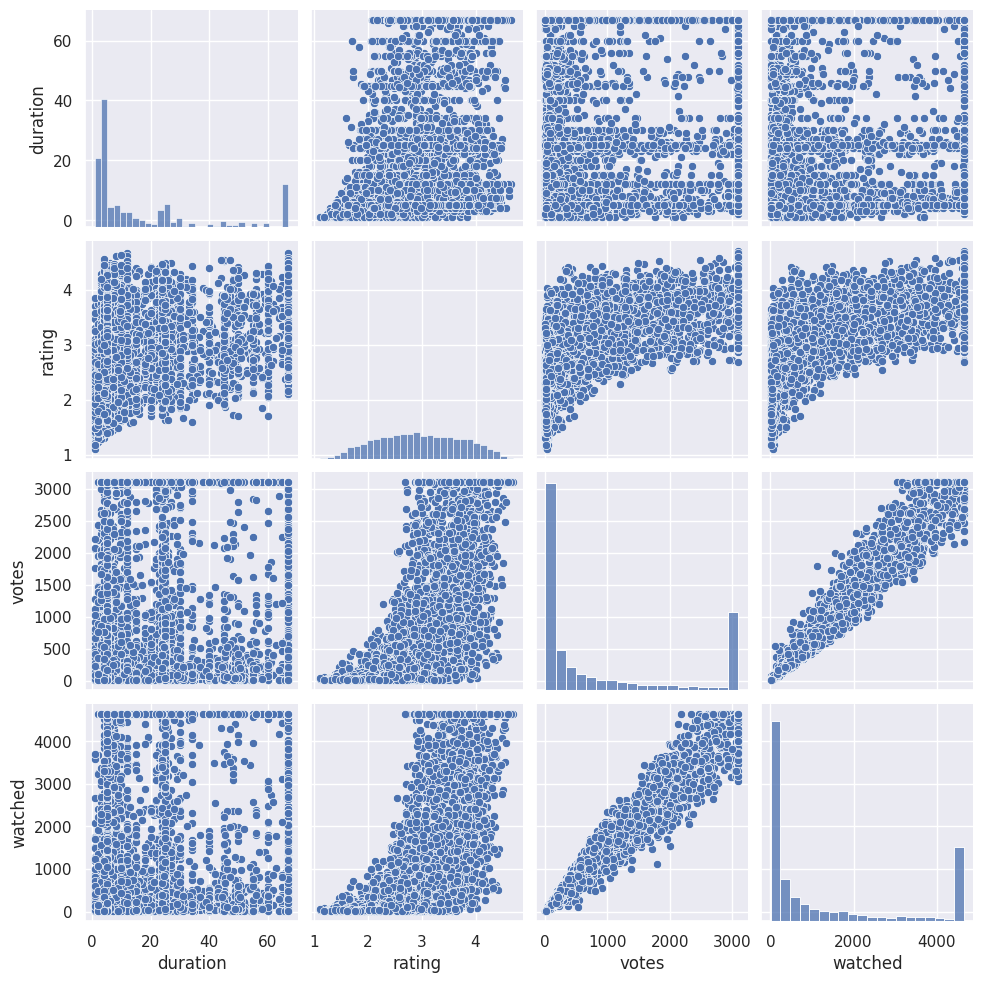

In [ ]:
# Select variables to plot
vars_to_plot = ['duration', 'rating', 'votes', 'watched']

# Create scatter plot matrix
sns.pairplot(df[vars_to_plot])

# Show plot
plt.show()

## Data Pre-processing(Feature Engineering)
### Missing Values

                Total    Percent
description      2409  36.930860
duration          275   4.215852
mediaType          27   0.413920
votes              27   0.413920
title               0   0.000000
eps                 0   0.000000
startYr             0   0.000000
finishYr            0   0.000000
contentWarn         0   0.000000
watched             0   0.000000
watching            0   0.000000
rating              0   0.000000
studio_primary      0   0.000000
studios_colab       0   0.000000
genre               0   0.000000


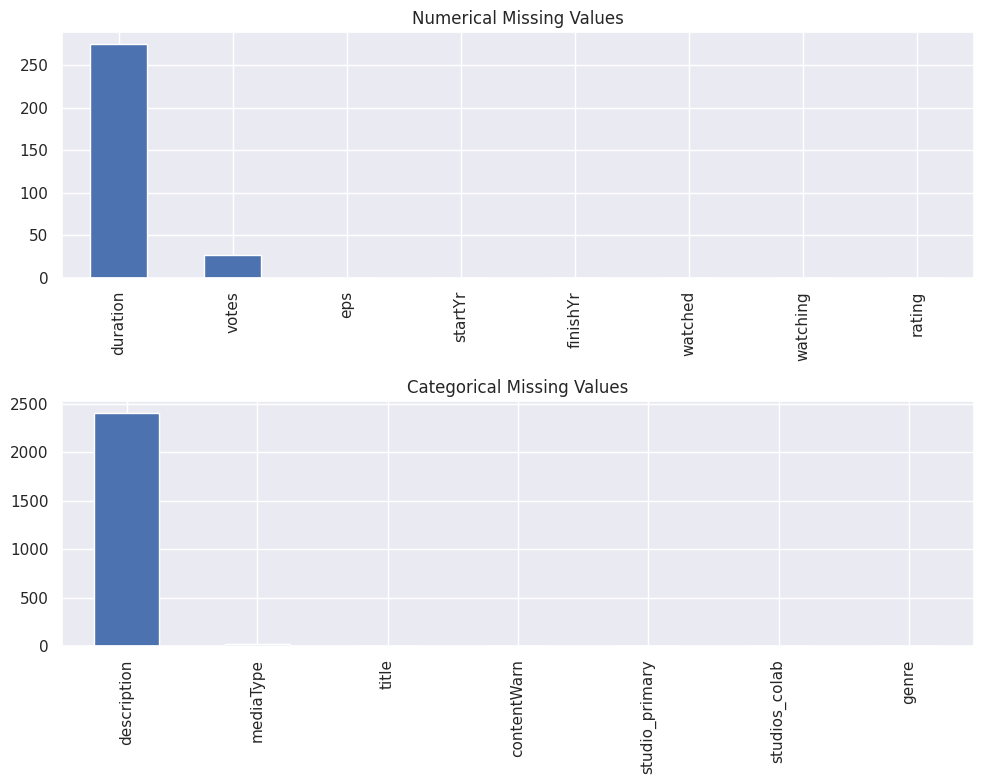

,Total,Percent
description,2409,36.930860
duration,275,4.215852
mediaType,27,0.413920
votes,27,0.413920
title,0,0.000000
eps,0,0.000000
startYr,0,0.000000
finishYr,0,0.000000
contentWarn,0,0.000000
watched,0,0.000000


In [ ]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    print(missing_data)
    
    # plot missing values for numerical and categorical variables
    fig, axes = plt.subplots(nrows=2, figsize=(10,8))
    num_missing = df.select_dtypes(include=['int64', 'float64']).isnull().sum().sort_values(ascending=False)
    num_missing.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Numerical Missing Values')
    cat_missing = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    cat_missing.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Categorical Missing Values')
    plt.tight_layout()
    plt.show()
    
    return missing_data # return the dataframe

missing_check(df)

### Plotting Missing values on Categorical Variables

<Axes: >

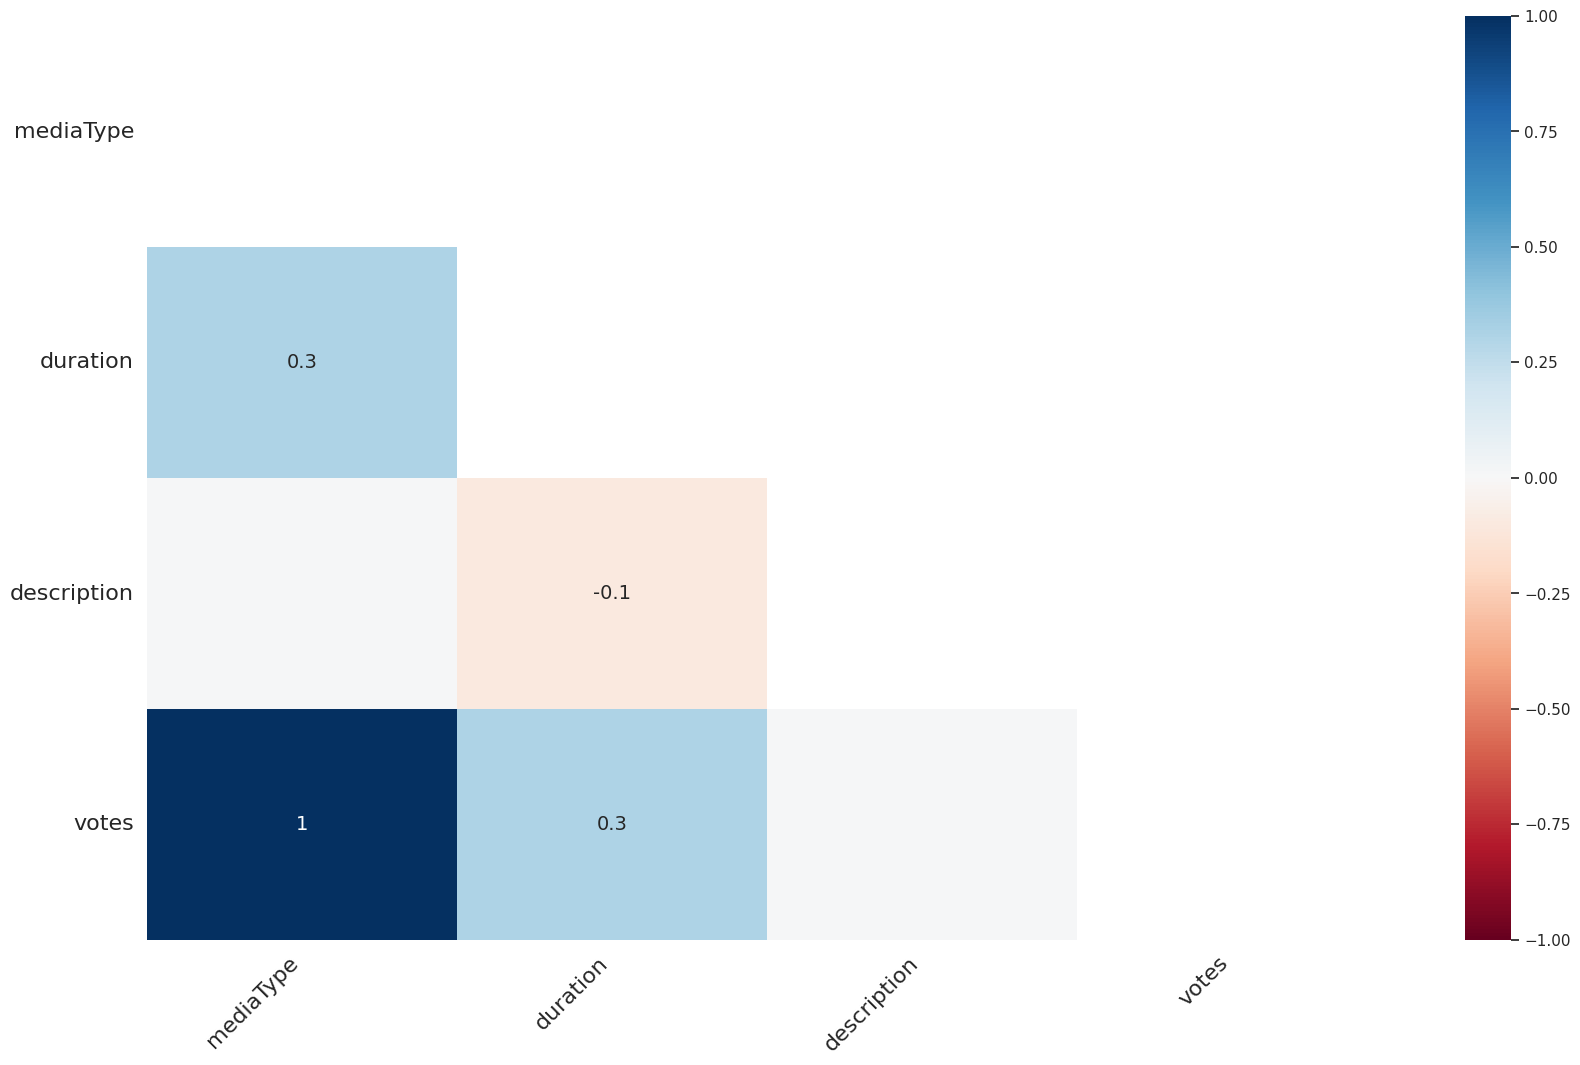

In [ ]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)


<Axes: >

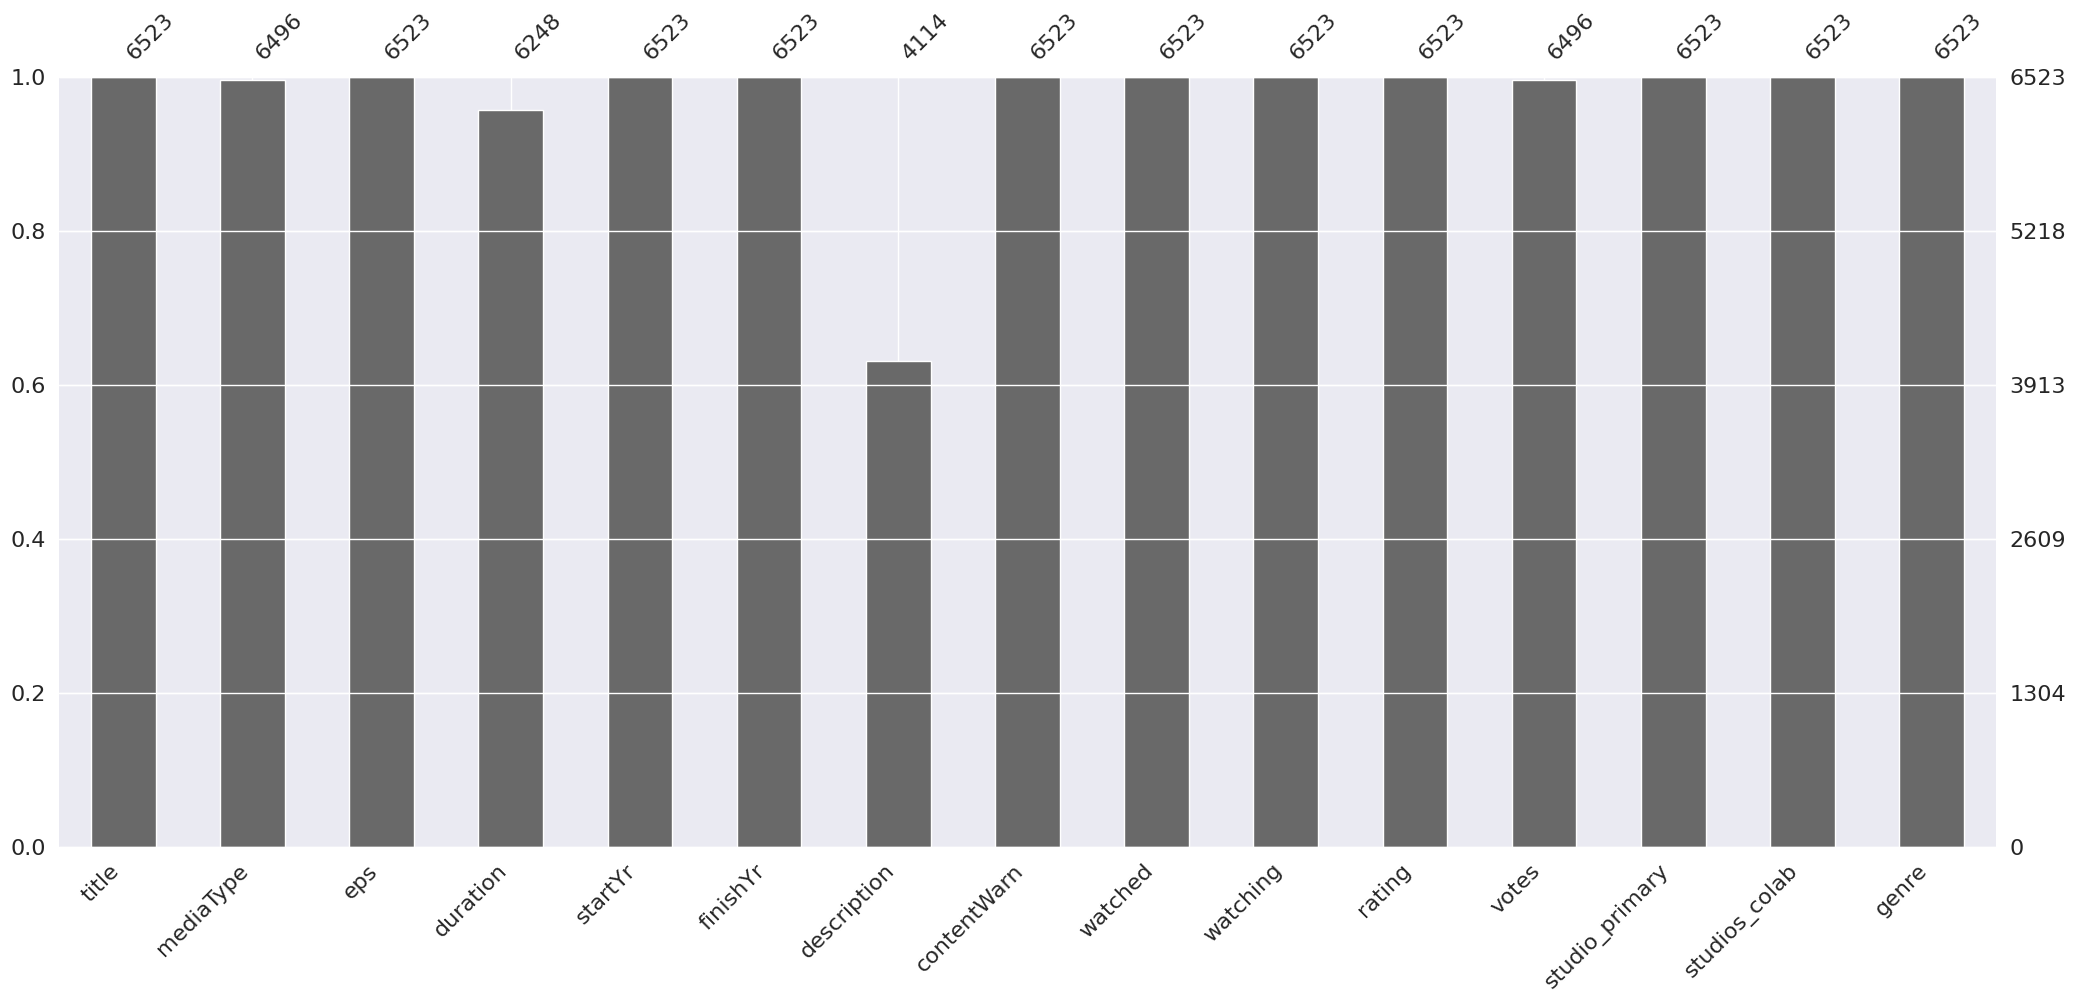

In [ ]:
# Program to visualize missing values in dataset

# Importing the libraries
import pandas as pd
import missingno as msno

# Visualize the number of missing
# values as a bar chart
msno.bar(df)


### Replacing mising values for both numerical and categorical variables

In [ ]:
mediaType_counts = df['mediaType'].value_counts()

print(mediaType_counts)

TV             2145
Movie          1085
OVA             933
Music Video     674
Web             590
DVD Special     457
Other           320
TV Special      292
Name: mediaType, dtype: int64


In [ ]:
df['mediaType'] = df['mediaType'].fillna('Other')


In [ ]:
# Impute missing values in votes column with the mean
df['votes'] = df['votes'].fillna(df['votes'].mean())

In [ ]:
# Impute missing values in votes column with the mean
df['duration'] = df['duration'].fillna(df['duration'].median())

In [ ]:
df.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

In [ ]:
# Drop unwanted columns
df.drop(['description'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

title             0
mediaType         0
eps               0
duration          0
startYr           0
finishYr          0
contentWarn       0
watched           0
watching          0
rating            0
votes             0
studio_primary    0
studios_colab     0
genre             0
dtype: int64

### Feuture Eng for Years

In [ ]:
df['Years_running'] = df['finishYr'] - df['startYr']
df.sample(n=5)

,title,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,Years_running
4954,Blue Spring Ride,TV,12,12.0,2014,2014,No,4649,199,4.193,3100.0,Production I.G,No,Other,0
6330,By Your Side,Other,1,5.0,2014,2014,No,144,4,3.005,101.0,Others,No,Other,0
3516,Macross II: Lovers Again,OVA,6,34.0,1992,1992,No,1598,32,3.028,959.0,Others,No,Other,0
4765,Chocchan's Story,Movie,1,67.0,1996,1996,No,72,1,3.263,34.0,Others,No,Other,0
361,The iDOLM@STER SideM: Passion of the Passion,DVD Special,1,25.0,2018,2018,No,39,4,3.072,22.0,A-1 Pictures,No,Other,0


## Handling of Outliers

#### Ploting Using IQR Method

In [ ]:
# calculate the first and third quartiles and the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# identify outliers for each numerical column using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# print the number of outliers for each column
print(outliers.sum())


Years_running     1411
contentWarn          0
duration           741
eps                625
finishYr           329
genre                0
mediaType            0
rating               0
startYr            344
studio_primary       0
studios_colab        0
title                0
votes                0
watched              0
watching             0
dtype: int64


<ipython-input-100-e6d33265ed35>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-100-e6d33265ed35>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-100-e6d33265ed35>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


- Keep the outliers: If you believe that the outliers are valid data points, you can keep them in your dataset and use robust statistical methods that are less sensitive to outliers, such as the median and the interquartile range.

### Data Preparation for Modeling

- We want to predict the rating of an anime
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# Drop unwanted columns
df.drop(['title','startYr','finishYr','Years_running'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mediaType       6523 non-null   object 
 1   eps             6523 non-null   int64  
 2   duration        6523 non-null   float64
 3   contentWarn     6523 non-null   object 
 4   watched         6523 non-null   int64  
 5   watching        6523 non-null   int64  
 6   rating          6523 non-null   float64
 7   votes           6523 non-null   float64
 8   studio_primary  6523 non-null   object 
 9   studios_colab   6523 non-null   object 
 10  genre           6523 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 560.7+ KB


In [ ]:
df.duplicated().any()

True

In [ ]:
# Shuffle the rows in the dataframe
df = df.sample(frac=1, random_state=42)

# Reset the index after shuffling
df = df.reset_index(drop=True)

In [ ]:
# Define X and Y variables
X = df.drop(["rating"], axis=1) # independent variables
y = df['rating'] # dependent variable

In [ ]:
X.head()

,mediaType,eps,duration,contentWarn,watched,watching,votes,studio_primary,studios_colab,genre
0,TV Special,1,24.0,Yes,2437,91,1468.0,Others,No,Other
1,Movie,1,4.0,No,103,0,71.0,Others,No,Other
2,OVA,1,28.0,No,4649,111,3100.0,Studio Deen,No,Other
3,OVA,3,30.0,Yes,101,4,68.0,Others,No,Other
4,Movie,1,67.0,No,285,11,189.0,Others,No,Other


In [ ]:
y.head()

0    3.578
1    1.815
2    4.325
3    2.122
4    3.794
Name: rating, dtype: float64

### One Hot ENcoding or Creating Dumies

In [ ]:
# iterate over the categorical columns and apply one-hot encoding
for col in X.select_dtypes(include=['object']):
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)

# print the encoded DataFrame
X.head()

,eps,duration,watched,watching,votes,mediaType_DVD Special,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,...,studios_colab_Yes,genre_Action,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1,24.0,2437,91,1468.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,4.0,103,0,71.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,28.0,4649,111,3100.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,30.0,101,4,68.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,67.0,285,11,189.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Train and Split Data

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the size of the train and test sets
print(f"Training set size: {len(X_train)} ({round(len(X_train)/len(X)*100,2)}%)")
print(f"Testing set size: {len(X_test)} ({round(len(X_test)/len(X)*100,2)}%)")

Training set size: 5218 (79.99%)
Testing set size: 1305 (20.01%)


### Building the Linear Regression Model

In [ ]:
# Building the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Printing the y-intercept value
print("Y-intercept:", model.intercept_)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating R^2 score to evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Y-intercept: 2.263656892213944
R-squared: 0.6941760869977254


In [ ]:
# add constant to X_train and X_test
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# fit OLS model to training data
model = sm.OLS(y_train, X_train).fit()

# predict using the model on test data
y_pred = model.predict(X_test)

# print model summary
print(model.summary())

# print R-squared value
print("R-squared:", model.rsquared)

# print coefficient values
print("Coefficients:", model.params)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     404.8
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:07:47   Log-Likelihood:                -2743.1
No. Observations:                5218   AIC:                             5552.
Df Residuals:                    5185   BIC:                             5769.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print('Training set evaluation:')
print('Mean squared error (MSE): {:.2f}'.format(mse_train))
print('Root mean squared error (RMSE): {:.2f}'.format(rmse_train))
print('R-squared (R2) score: {:.2f}'.format(r2_train))
print('\nTesting set evaluation:')
print('Mean squared error (MSE): {:.2f}'.format(mse_test))
print('Root mean squared error (RMSE): {:.2f}'.format(rmse_test))
print('R-squared (R2) score: {:.2f}'.format(r2_test))


Training set evaluation:
Mean squared error (MSE): 0.17
Root mean squared error (RMSE): 0.41
R-squared (R2) score: 0.71

Testing set evaluation:
Mean squared error (MSE): 0.17
Root mean squared error (RMSE): 0.41
R-squared (R2) score: 0.69


In [ ]:
# Calculate R-squared on test data
r2 = r2_score(y_test, y_pred)

# Calculate the number of predictors
num_predictors = X_train.shape[1]

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - num_predictors - 1))

# Print the results
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)

R-squared: 0.6941760869977199
Adjusted R-squared: 0.684996538266214


In [ ]:
# Create a dataframe with the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

      Actual  Predicted
5193   2.986   3.656947
5238   1.721   2.237234
6121   2.709   2.764101
2304   3.729   3.278717
4922   3.526   3.050218
...      ...        ...
5038   2.660   2.315575
4954   2.736   2.392219
6064   2.494   2.616593
4913   2.377   2.827778
5545   3.596   2.877887

[1305 rows x 2 columns]


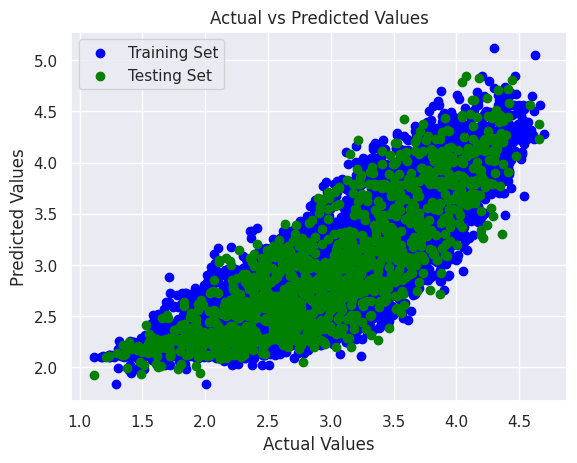

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained and fit your model and obtained predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Plot the actual and predicted values for the training set
plt.scatter(y_train, y_pred_train, color='blue', label='Training Set')

# Plot the actual and predicted values for the testing set
plt.scatter(y_test, y_pred_test, color='green', label='Testing Set')

# Add a title and labels for the axes
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## Linear Regression Assumptions

Here are the key assumptions of linear regression:

1. Linearity: The relationship between the independent and dependent variable is linear. This means that a straight line is a good approximation for the relationship.

2. Independence: The observations are independent of each other. This means that the value of one observation does not depend on the value of another observation.

3. Homoscedasticity: The variance of the errors is constant across all levels of the independent variable. In other words, the spread of the residuals should be approximately the same for all values of the independent variable.

4. Normality: The residuals are normally distributed. This means that the errors follow a normal distribution with a mean of zero.

5. No Multicollinearity: The independent variables should not be highly correlated with each other. This can lead to unstable and unreliable estimates of the coefficients.

It is important to check these assumptions before using the results of a linear regression model for inference or prediction.

1. Residual {plot

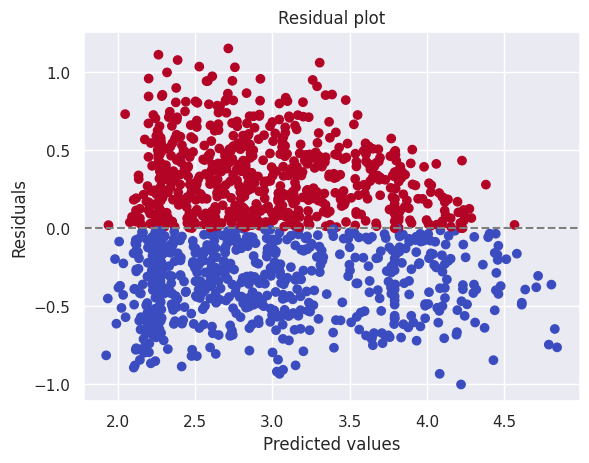

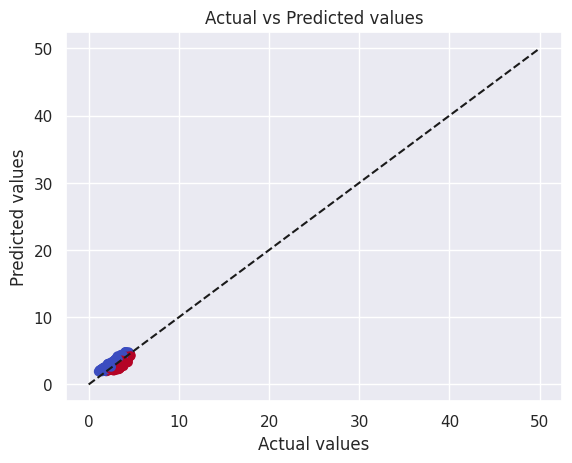

In [ ]:
# Predict the target values for the test set
y_pred = model.predict(X_test)

# Compute the residuals
residuals = y_test - y_pred

# Create a residual plot with different colors for positive and negative residuals
plt.scatter(y_pred, residuals, c=np.sign(residuals), cmap='coolwarm')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Create a graph with different colors for the actual and predicted values
plt.scatter(y_test, y_pred, c=np.sign(residuals), cmap='coolwarm')
plt.plot([0, 50], [0, 50], '--k')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()








In [ ]:
# Compute the residuals
residuals = y_test - y_pred
residuals

5193   -0.670947
5238   -0.516234
6121   -0.055101
2304    0.450283
4922    0.475782
          ...   
5038    0.344425
4954    0.343781
6064   -0.122593
4913   -0.450778
5545    0.718113
Length: 1305, dtype: float64

Linearity is one of the assumptions of linear regression, which means that the relationship between the dependent variable and the independent variable(s) is linear. 

If there is a clear pattern in the residual plot, such as a curved shape, this indicates that the relationship between the dependent and independent variable is not strictly linear. This could mean that the model is not appropriate for the data and may need to be adjusted or a different type of model may need to be used. 

On the other hand, if there is no clear pattern in the residual plot, and the residuals appear to be randomly scattered around the zero line, then this suggests that the linear regression model is a good fit for the data, and the assumption of linearity is met.

## Test for independence

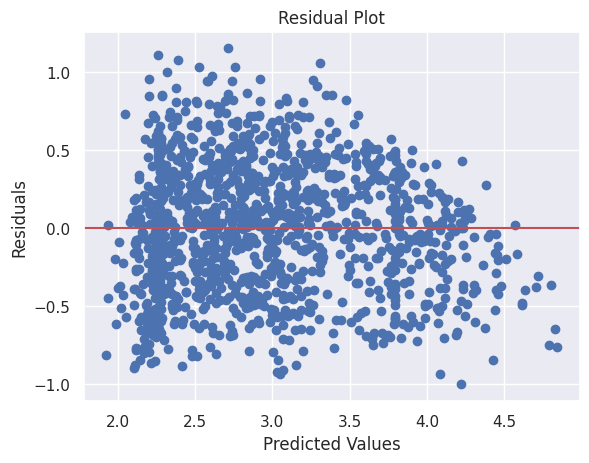

In [ ]:
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Test for Homoscedasticity

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Calculate residuals for the test set
residuals = y_test - model.predict(X_test)

# Conduct Goldfeld-Quandt test
gq_test = het_goldfeldquandt(residuals, X_test)

# Print the test results
print('Goldfeld-Quandt test results:')
print('F-statistic:', gq_test[0])
print('p-value:', gq_test[1])
print('Test result:', 'Fail to reject null hypothesis' if gq_test[1] > 0.05 else 'Reject null hypothesis')


Goldfeld-Quandt test results:
F-statistic: 1.094677188446467
p-value: 0.13026343243101943
Test result: Fail to reject null hypothesis


-  The test result is then determined based on the p-value. If the p-value is greater than 0.05, we fail to reject the null hypothesis of homoscedasticity, otherwise, we reject the null hypothesis and conclude that there is heteroscedasticity present in the dat

## Multicolinearity

- Variance Inflation Factor (VIF): VIF is a measure of the extent to which the variance of an estimated regression coefficient is increased due to multicollinearity in the model.
-  A VIF of 1 indicates no multicollinearity, while a VIF of 5 or higher indicates high multicollinearity.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit the linear regression model
#model = sm.OLS(y, X).fit()

# Calculate the VIF values for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the VIF values
vif


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,3.410680,eps
1,2.600744,duration
2,65.033262,watched
3,5.025396,watching
4,75.775842,votes
5,inf,mediaType_DVD Special
6,inf,mediaType_Movie
7,inf,mediaType_Music Video
8,inf,mediaType_OVA
9,inf,mediaType_Other


- The table you provided shows the Variance Inflation Factor (VIF) for each independent variable included in the regression analysis. VIF measures the degree of multicollinearity among the independent variables, with a value of 1 indicating no multicollinearity and higher values indicating increasing levels of multicollinearity.

- Variables with a VIF greater than 5 are typically considered to have high multicollinearity, and those with a VIF greater than 10 are considered to have very high multicollinearity. Looking at the table, we can see that the following variables have high multicollinearity: watched, watching, and votes. Additionally, all of the categorical variables have an infinite VIF, indicating perfect multicollinearity.

- In terms of interpretation, high multicollinearity among independent variables can make it difficult to interpret the coefficients of the regression model, as well as reduce the accuracy of the model's predictions. One way to address high multicollinearity is to remove one or more of the highly correlated variables from the model. Another approach is to use regularization techniques, such as ridge regression or lasso regression, which penalize large coefficients and can help to reduce multicollinearity.

In [ ]:
# Identify variables with high VIF values
high_vif = vif.loc[vif['VIF Factor'] > 5]

# Print the variables with high VIF values
print("Variables with high VIF values:")
high_vif



Variables with high VIF values:


,VIF Factor,features
2,65.033262,watched
3,5.025396,watching
4,75.775842,votes
5,inf,mediaType_DVD Special
6,inf,mediaType_Movie
7,inf,mediaType_Music Video
8,inf,mediaType_OVA
9,inf,mediaType_Other
10,inf,mediaType_TV
11,inf,mediaType_TV Special


In [ ]:
# Remove variables with high VIF values
X1 = X.drop(high_vif['features'], axis=1)

# Calculate the VIF values for the remaining independent variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns

# Print the VIF values
print("VIF values after removing variables with high VIF:")
print(vif)


VIF values after removing variables with high VIF:
   VIF Factor  features
0     1.04304       eps
1     1.04304  duration


In [ ]:
# Re-run the linear regression model
model_new = sm.OLS(y, X1).fit()

# Print the regression results
print(model_new.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              9500.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:12:47   Log-Likelihood:                         -12098.
No. Observations:                6523   AIC:                                  2.420e+04
Df Residuals:                    6521   BIC:                                  2.421e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------